In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Dropout
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.optimizers import Adam


from tensorflow.keras.datasets import cifar10
import numpy as np
from matplotlib import pyplot as plt

In [19]:
def create_denoising_autoencoder():
    input_img = Input(shape=(32, 32, 3))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

In [20]:
# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizar los datos
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32')   / 255.

In [21]:

# Generar datos ruidosos
noise_factor = 0.10
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)



In [22]:
# Seleccionar directorio para guardar los logs
logs_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir, histogram_freq=1)

In [23]:
autoencoder = create_denoising_autoencoder()


# Entrenar el autoencoder
hist = autoencoder.fit(X_train_noisy, X_train, epochs=30, batch_size=256, shuffle=True, validation_data=(X_test_noisy, X_test), callbacks=[tensorboard_callback])

d:\UMA\TFG\TFG-Adversarial\myenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
196/196 [==============================] - 16s 74ms/step - loss: 0.0150 - val_loss: 0.0346
Epoch 2/30
196/196 [==============================] - 13s 65ms/step - loss: 0.0081 - val_loss: 0.0112
Epoch 3/30
196/196 [==============================] - 13s 65ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 4/30
196/196 [==============================] - 13s 68ms/step - loss: 0.0067 - val_loss: 0.0048
Epoch 5/30
196/196 [==============================] - 13s 69ms/step - loss: 0.0062 - val_loss: 0.0048
Epoch 6/30
196/196 [==============================] - 13s 66ms/step - loss: 0.0059 - val_loss: 0.0044
Epoch 7/30
196/196 [==============================] - 13s 65ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 8/30
196/196 [==============================] - 13s 68ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 9/30
196/196 [==============================] - 13s 65ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 10/30
196/196 [==============================] - 13s 67ms/step - loss: 0.005

In [24]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        1849

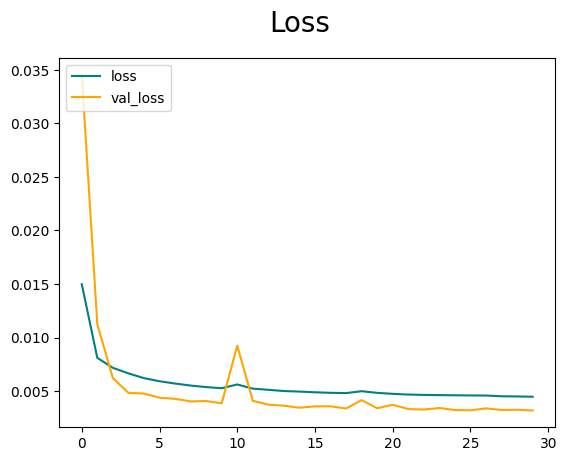

In [25]:
# Evaluar la pérdida del modelo
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
autoencoder.save('autoencoder.h5')

In [ ]:
autoencoder_model = tf.keras.models.load_model('autoencoder.h5')
